# Setting Up

## Downloading the necessary libraries if not yet installed (New virtual environment)

In [26]:
#pip install pandas
#pip install seaborn
#pip install matplotlib
#pip install numpy
#pip install statsmodels
#pip install scipy
#pip install scikit-learn
#pip install imblearn

## Importing necessary libraries and files

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [28]:
base_data = pd.read_csv("Loan Default II (Employed).csv")

## Checking what is in the dataframe

In [29]:
base_data

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [30]:
base_data.describe() #Obtaining summary statistics of each column

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [31]:
base_data.apply(lambda x:sum(x.isnull()), axis = 0) #Checking the number of NA values in each column

#df.isnull().sum() works too

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [32]:
base_data.dtypes

Index              int64
Employed           int64
Bank Balance     float64
Annual Salary    float64
Defaulted?         int64
dtype: object

## Dropping unnecessary variable "index"

In [33]:
base_data_dropped = base_data.drop(["Index"], axis = 1)

### Checking that the variable was dropped correctly

In [34]:
base_data_dropped

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


# Exploratory Data Analysis

## Visualising the Dataset to Identify Imbalance

### Visualising "Defaulted?" Column

In [35]:
#Getting the count of each category of Defaulted?
base_data_dropped["Defaulted?"].value_counts()

Defaulted?
0    9667
1     333
Name: count, dtype: int64

<Axes: xlabel='Defaulted?', ylabel='count'>

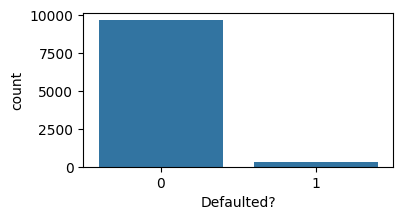

In [36]:
plt.figure(figsize = (4,2))
sns.countplot(x = 'Defaulted?', data = base_data_dropped)
#Imbalanced dataset, will need to oversample using SMOTE because Defaulted? is the y-variable

### Visualising "Employed" Column

In [37]:
#Getting the count of each category of Employed
base_data_dropped["Employed"].value_counts()

Employed
1    7056
0    2944
Name: count, dtype: int64

<Axes: xlabel='Employed', ylabel='count'>

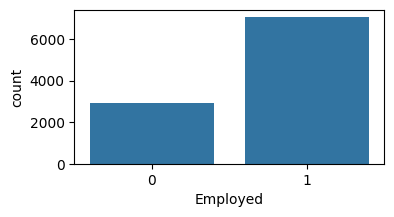

In [38]:
plt.figure(figsize = (4,2))
sns.countplot(x = 'Employed', data = base_data_dropped)

### Visualising the Relationship between Default Status and Employment Status

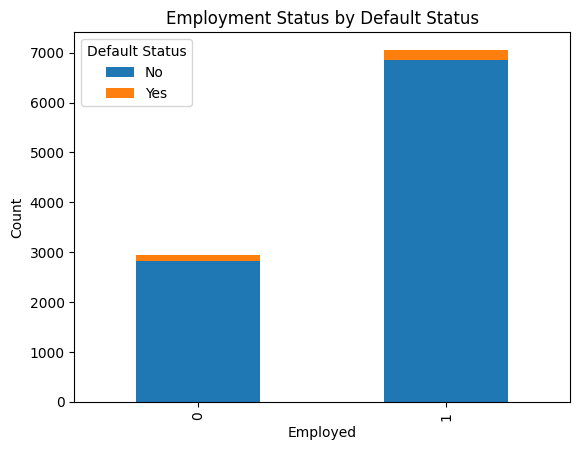

In [39]:
base_data_dropped.groupby(["Employed", "Defaulted?"])["Defaulted?"].count().unstack().plot.bar(stacked = True)
plt.legend(title = "Default Status", labels = ["No", "Yes"])
plt.title("Employment Status by Default Status")
plt.ylabel("Count")
plt.show()

### Visualising the Relationship between Default Status and Bank Balance

<Figure size 400x200 with 0 Axes>

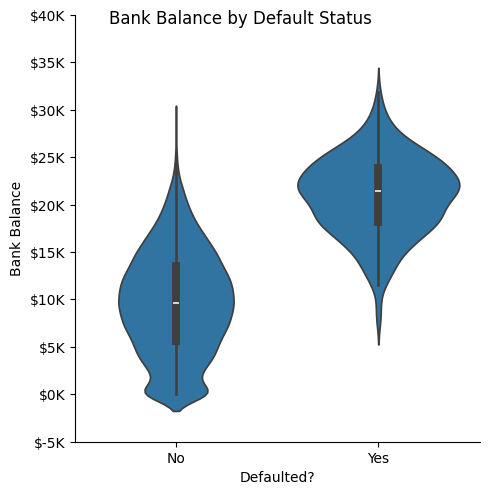

<Figure size 400x200 with 0 Axes>

In [40]:
chart = sns.catplot(x = "Defaulted?", y = "Bank Balance", data = base_data_dropped, kind = "violin")
ticks = chart.axes[0][0].get_yticks()
ylabels = ['$' + '{:,.0f}'.format(y/1000) + 'K' for y in ticks]
chart.set_yticklabels(ylabels)
chart.set_xticklabels(["No", "Yes"])
chart.fig.suptitle("Bank Balance by Default Status")
chart.set(xlabel = "Defaulted?", ylabel = "Bank Balance")
plt.figure(figsize = (4,2))

From the visualisation above, it appears that those who defaulted tend to be the ones with the higher bank balance, which is an interesting observation as it suggests that those with the financial ability to repay their loans are the one who choose to not pay, rather than those without the ability to do so.

### Visualising the Relationship between Annual Salary and Bank Balance

<Figure size 400x200 with 0 Axes>

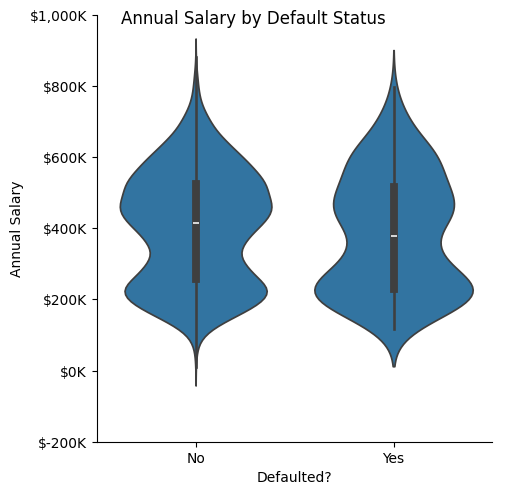

<Figure size 400x200 with 0 Axes>

In [41]:
chart = sns.catplot(x = "Defaulted?", y = "Annual Salary", data = base_data_dropped, kind = "violin")
ticks = chart.axes[0][0].get_yticks()
ylabels = ['$' + '{:,.0f}'.format(y/1000) + 'K' for y in ticks]
chart.set_yticklabels(ylabels)
chart.set_xticklabels(["No", "Yes"])
chart.fig.suptitle("Annual Salary by Default Status")
chart.set(xlabel = "Defaulted?", ylabel = "Annual Salary")
plt.figure(figsize = (4,2))

From the visualisation above, there appears to be no clear relationship between the Annual Salary earned by the lendees and their Default Status as the Annual Salary distribution of both those who defaulted and those who did not are very similar.

# Data Modelling

## Data Preparation

### Setting up the dummy variables for Employed

In [42]:
base_data_dropped = pd.get_dummies(base_data_dropped, columns = ["Employed"])

## Converting Defaulted? into a Categorical Variable

In [43]:
base_data_dropped["Defaulted?"] = base_data_dropped["Defaulted?"].astype("category")

## Splitting dataset into Independent (X) and Dependent (Y) variables

In [44]:
X = base_data_dropped.drop(["Defaulted?"], axis = 1)
Y = base_data_dropped["Defaulted?"]

## Checking for Collinearity between Independent (X) variables using VIF

In [45]:
#1 = Not Correlated
#Between 1 and 10 = Moderately Correlated
#Greater than 10 = Highly Correlated
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.drop(["Employed_0", "Employed_1"], axis = 1).columns 
vif_data["VIF"] = [variance_inflation_factor(X.drop(["Employed_0", "Employed_1"], axis = 1).values, i) for i in range(len(X.drop(["Employed_0", "Employed_1"], axis = 1).columns))] 
print(vif_data)

         feature       VIF
0   Bank Balance  2.512577
1  Annual Salary  2.512577


The factors are only moderately correlated and hence, there is no need for any further action as they are not highly correlated.

There is no need to normalise the data despite Bank Balance and Annual Salary being different in scale as we are using CART.

## Beginning Train-Test Split

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test =  train_test_split(X,Y, random_state = 3415)

In [47]:
#Oversampling using SMOTE due to imbalanced dataset
from imblearn.over_sampling import SMOTE
X_train, Y_train = SMOTE(random_state = 3415).fit_resample(X_train, Y_train)

### Decision Tree

In [48]:
from sklearn import tree

model = tree.DecisionTreeClassifier(random_state = 3415) #Classifier since Y variable is categorical
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy :",(cm[0,0] + cm[1,1])/(sum(sum(cm))))
# print("Precision: ",cm[1,1]/(cm[0,1]+cm[1,1]))
# print("Recall: ",cm[1,1]/(cm[1,0]+cm[1,1]))

Accuracy : 0.9128


Based on the results, the unpruned tree has an accuracy of 91.28%

### Visualising the Tree

[Text(0.34732431630763577, 0.9814814814814815, 'x[0] <= 16045.26\ngini = 0.5\nsamples = 14504\nvalue = [7252, 7252]'),
 Text(0.09893147269907675, 0.9444444444444444, 'x[0] <= 13248.896\ngini = 0.158\nsamples = 6885\nvalue = [6291, 594]'),
 Text(0.22312789450335627, 0.962962962962963, 'True  '),
 Text(0.03633511252163878, 0.9074074074074074, 'x[0] <= 11509.32\ngini = 0.042\nsamples = 5431\nvalue = [5314, 117]'),
 Text(0.014425851125216388, 0.8703703703703703, 'x[1] <= 553827.312\ngini = 0.012\nsamples = 4566\nvalue = [4538.0, 28.0]'),
 Text(0.013271783035199077, 0.8333333333333334, 'gini = 0.0\nsamples = 3583\nvalue = [3583, 0]'),
 Text(0.015579919215233698, 0.8333333333333334, 'x[1] <= 557300.281\ngini = 0.055\nsamples = 983\nvalue = [955, 28]'),
 Text(0.009232544720138488, 0.7962962962962963, 'x[0] <= 7790.1\ngini = 0.47\nsamples = 53\nvalue = [33, 20]'),
 Text(0.008078476630121177, 0.7592592592592593, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.0103866128101558, 0.759259259

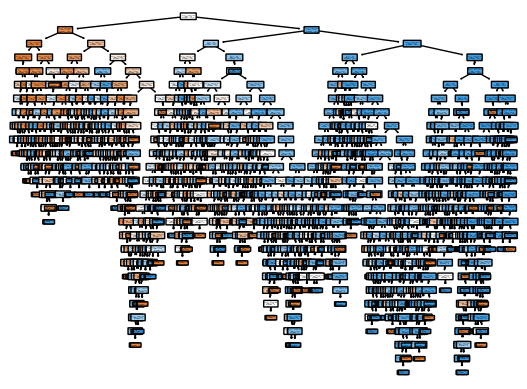

In [49]:
tree.plot_tree(model, filled = True, rounded = True)

This tree would require pruning to prevent overfitting normally.

# Predicting User's Input (Prescriptive Action)

In [57]:
#Step 1: Prompting user for input
bank_balance = float(input("Enter the bank balance: "))
annual_salary = float(input("Enter the annual salary: "))

#Step 2: Handling employment status and map to dummy variables
employment_status = input("Are you employed? (yes/no): ").strip().lower()

if employment_status == "yes":
    employed_0 = 0
    employed_1 = 1
elif employment_status == "no":
    employed_0 = 1
    employed_1 = 0
else:
    print("Invalid input for employment status.")
    employed_0 = employed_1 = None  # Handle invalid input

#Step 3: Creating input array
input_data = [[bank_balance, annual_salary, employed_0, employed_1]]

#Step 4: Using the trained model to predict
if None not in input_data[0]:  #Ensuring valid data input
    predicted_default_rate = model.predict(input_data)
    if predicted_default_rate == 0:
        print("The loan is safe to approve as the risk of default is low.")
    else:
        print("Please review the criteria again. There is a high risk of default for this candidate.")
else:
    print("Invalid input. Cannot make a prediction.")

The loan is safe to approve as the risk of default is low.


/Users/atherialdawn/Documents/Programming Stuff/BC3415 AI in Accounting & Finance/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
